In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = 999

In [40]:
df = pd.read_csv('./dataset/hour.csv')
print(df.shape)
df.head()

(17379, 17)


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [42]:
df.isnull().sum().sum()

0

In [43]:
data = df.drop(columns=['instant','dteday','casual','registered','yr','atemp'])
data.shape

(17379, 11)

In [44]:
data.head()

,season,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,1,0,0,6,0,1,0.24,0.81,0.0,16
1,1,1,1,0,6,0,1,0.22,0.80,0.0,40
2,1,1,2,0,6,0,1,0.22,0.80,0.0,32
3,1,1,3,0,6,0,1,0.24,0.75,0.0,13
4,1,1,4,0,6,0,1,0.24,0.75,0.0,1


In [45]:
data.columns=['season','month','hour','holiday','weekday','working','weathersit','temp','humidity','windspeed','count']

In [46]:
data.head()

,season,month,hour,holiday,weekday,working,weathersit,temp,humidity,windspeed,count
0,1,1,0,0,6,0,1,0.24,0.81,0.0,16
1,1,1,1,0,6,0,1,0.22,0.80,0.0,40
2,1,1,2,0,6,0,1,0.22,0.80,0.0,32
3,1,1,3,0,6,0,1,0.24,0.75,0.0,13
4,1,1,4,0,6,0,1,0.24,0.75,0.0,1


In [47]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
season,17379.0,2.501640,1.106918,1.00,2.0000,3.000,3.0000,4.0000
month,17379.0,6.537775,3.438776,1.00,4.0000,7.000,10.0000,12.0000
hour,17379.0,11.546752,6.914405,0.00,6.0000,12.000,18.0000,23.0000
holiday,17379.0,0.028770,0.167165,0.00,0.0000,0.000,0.0000,1.0000
weekday,17379.0,3.003683,2.005771,0.00,1.0000,3.000,5.0000,6.0000
working,17379.0,0.682721,0.465431,0.00,0.0000,1.000,1.0000,1.0000
weathersit,17379.0,1.425283,0.639357,1.00,1.0000,1.000,2.0000,4.0000
temp,17379.0,0.496987,0.192556,0.02,0.3400,0.500,0.6600,1.0000
humidity,17379.0,0.627229,0.192930,0.00,0.4800,0.630,0.7800,1.0000
windspeed,17379.0,0.190098,0.122340,0.00,0.1045,0.194,0.2537,0.8507


In [48]:
categorical_cols = ['season','month','holiday','weekday','working','weathersit','hour']
numerical_cols = ['temp','humidity','windspeed','count']

In [49]:
data.duplicated().sum()

2

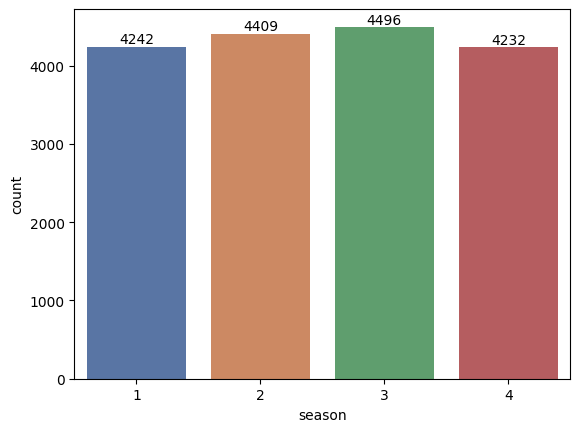

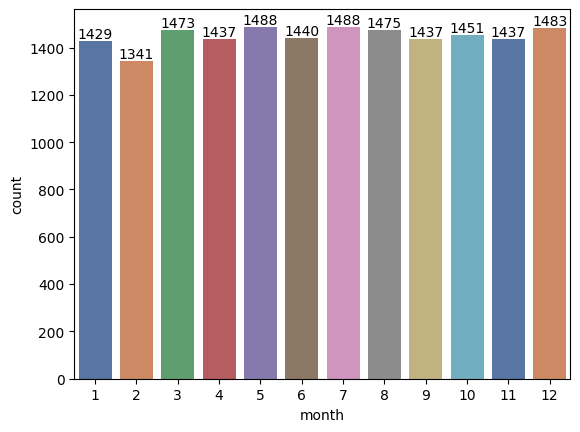

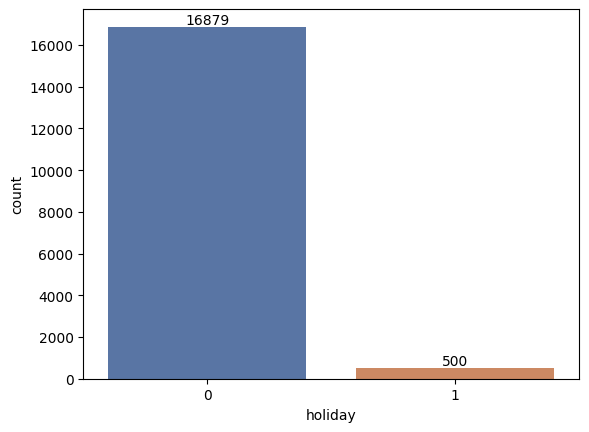

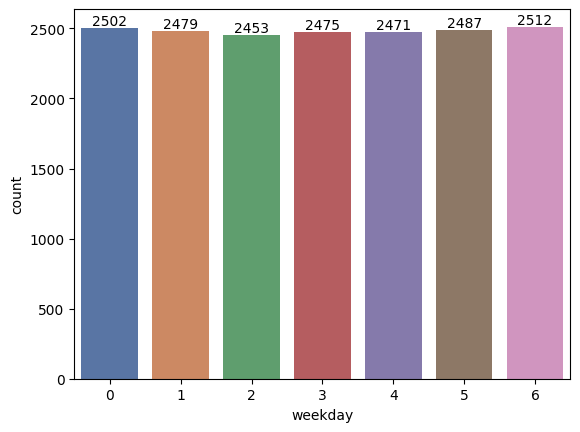

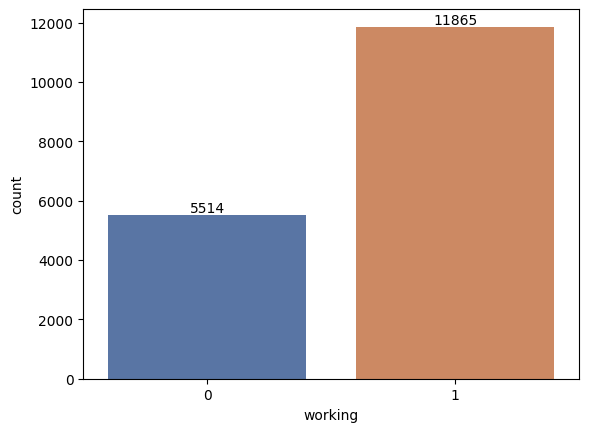

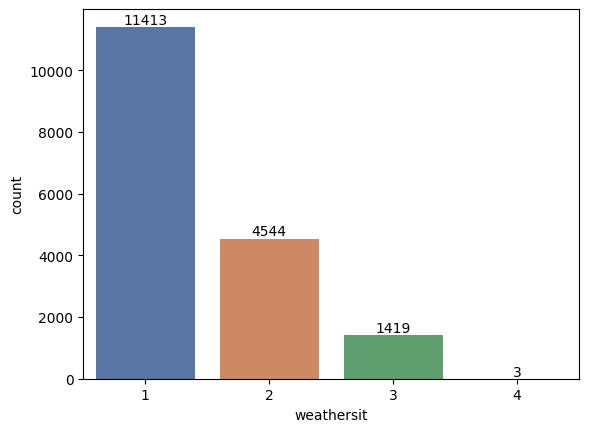

In [50]:
for i in categorical_cols[:-1]:
    ax = sns.countplot(data=data, x = i,palette='deep')
    ax.bar_label(ax.containers[0])
    plt.show()

### Groupby

In [51]:
data.apply(lambda x: x.nunique())

season          4
month          12
hour           24
holiday         2
weekday         7
working         2
weathersit      4
temp           50
humidity       89
windspeed      30
count         869
dtype: int64

In [52]:
data.groupby(by=['season','working'])['count'].agg('sum')

season  working
1       0          137683
        1          333665
2       0          287976
        1          630613
3       0          312056
        1          749073
4       0          262554
        1          579059
Name: count, dtype: int64

In [53]:
data.groupby(by=['season','weathersit'])['count'].agg('sum')

season  weathersit
1       1             325278
        2             124205
        3              21642
        4                223
2       1             664463
        2             207363
        3              46763
3       1             801941
        2             212932
        3              46256
4       1             546491
        2             251452
        3              43670
Name: count, dtype: int64

In [54]:
data.groupby(by=['working','weathersit'])['count'].agg('sum')

working  weathersit
0        1              747219
         2              211982
         3               41045
         4                  23
1        1             1590954
         2              583970
         3              117286
         4                 200
Name: count, dtype: int64

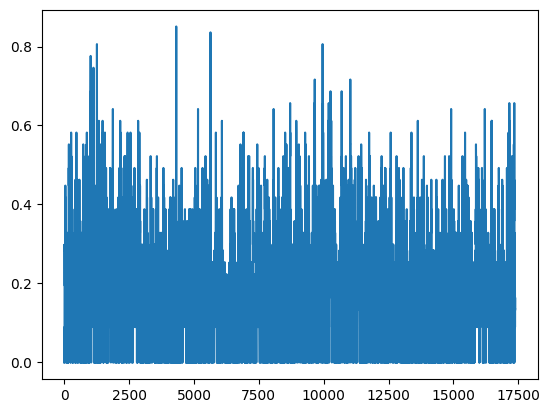

In [55]:
plt.plot(data['windspeed'])

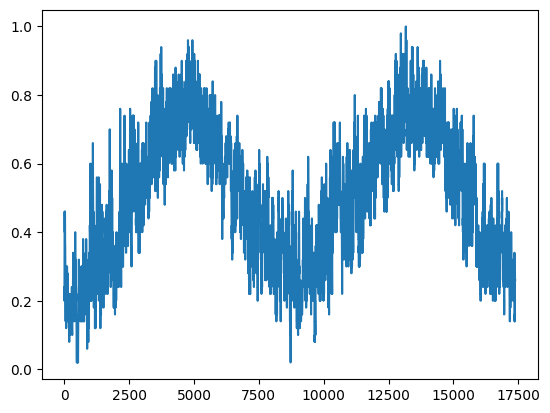

In [56]:
plt.plot(data['temp'])

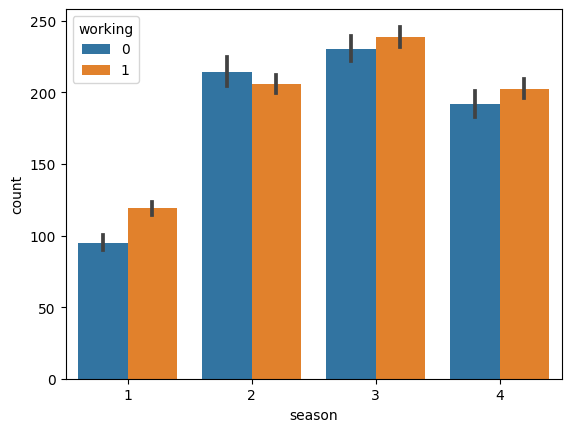

In [57]:
ax = sns.barplot(data=data,x='season',y='count',hue='working')
plt.show()

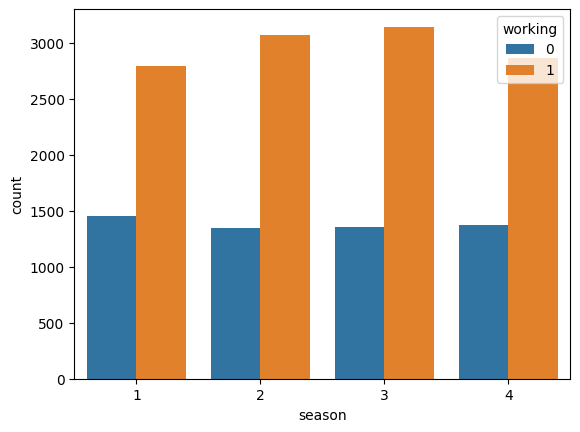

In [58]:
ax = sns.countplot(data=data,x='season',hue='working')
plt.show()

### Boxplot

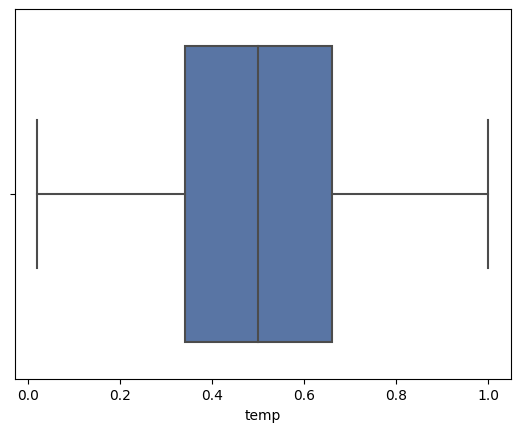

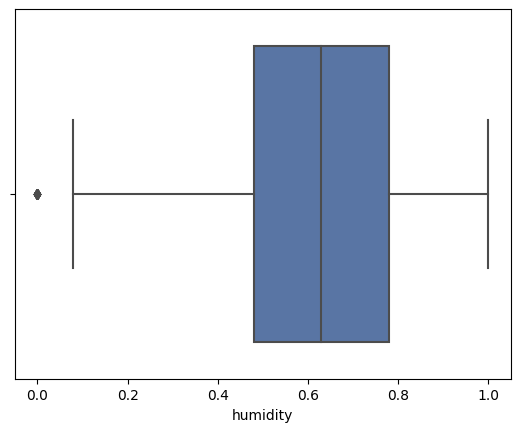

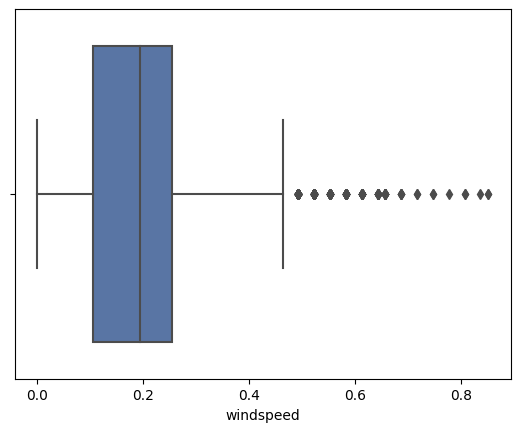

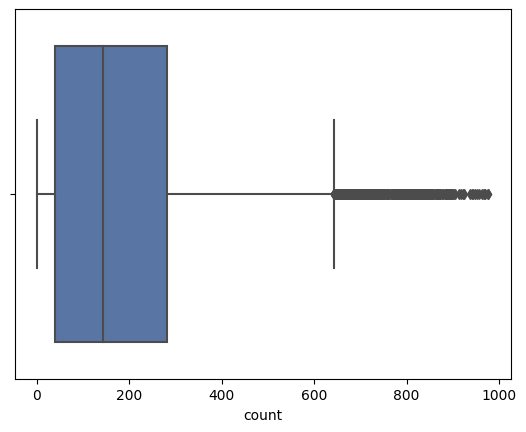

In [59]:
for i in numerical_cols:
    ax = sns.boxplot(data=data, x = i,palette='deep')
    plt.show()

<AxesSubplot: xlabel='count'>

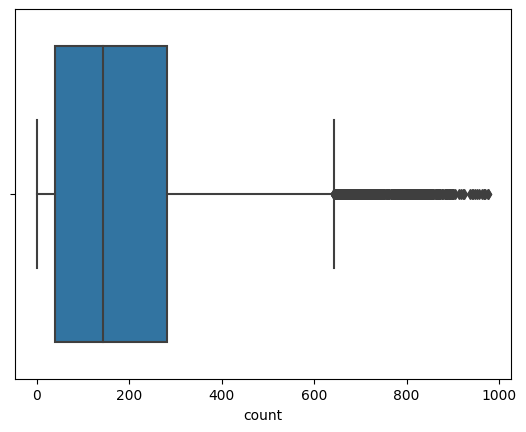

In [60]:
sns.boxplot(data=data,x='count')

### Skewness and kurtosis

In [61]:
data.skew()

season       -0.005416
month        -0.009253
hour         -0.010680
holiday       5.638538
weekday      -0.002998
working      -0.785258
weathersit    1.228047
temp         -0.006021
humidity     -0.111287
windspeed     0.574905
count         1.277412
dtype: float64

In [62]:
data.kurt()

season        -1.334251
month         -1.201878
hour          -1.198021
holiday       29.796540
weekday       -1.255997
working       -1.383529
weathersit     0.350151
temp          -0.941844
humidity      -0.826117
windspeed      0.590820
count          1.417203
dtype: float64

In [63]:
data[data['count']>281]

,season,month,hour,holiday,weekday,working,weathersit,temp,humidity,windspeed,count
1070,1,2,8,0,4,1,1,0.32,0.57,0.0896,285
1103,1,2,17,0,5,1,1,0.66,0.34,0.3582,327
1305,1,2,14,0,0,0,1,0.44,0.47,0.0896,282
1634,1,3,15,0,0,0,1,0.48,0.39,0.3284,304
1673,1,3,8,0,2,1,1,0.26,0.70,0.0896,282
...,...,...,...,...,...,...,...,...,...,...,...
17110,4,12,17,0,4,1,2,0.34,0.66,0.1940,475
17111,4,12,18,0,4,1,2,0.34,0.71,0.1940,381
17125,1,12,8,0,5,1,2,0.32,0.57,0.2836,472
17134,1,12,17,0,5,1,2,0.26,0.56,0.3284,321


### Correlation

<AxesSubplot: >

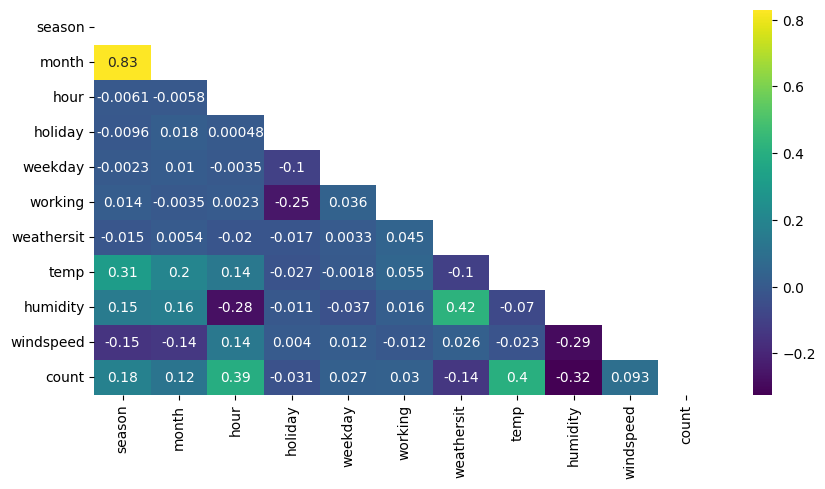

In [64]:
plt.figure(figsize=(10,5))
mask = np.zeros_like(data.corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(data.corr(), cmap='viridis', annot=True,mask=mask)

#### Season and Month

In [65]:
data.groupby(by=['season','month'])['count'].agg('sum')

season  month
1       1        134933
        2        151352
        3        142065
        12        42998
2       3         86855
        4        269094
        5        331686
        6        230954
3       6        115388
        7        344948
        8        351194
        9        249599
4       9         96392
        10       322352
        11       254831
        12       168038
Name: count, dtype: int64

In [66]:
data[['month','season','count']].corr()

,month,season,count
month,1.000000,0.830386,0.120638
season,0.830386,1.000000,0.178056
count,0.120638,0.178056,1.000000


##### need to drop season column

In [67]:
data = data.drop(columns='season')
data

,month,hour,holiday,weekday,working,weathersit,temp,humidity,windspeed,count
0,1,0,0,6,0,1,0.24,0.81,0.0000,16
1,1,1,0,6,0,1,0.22,0.80,0.0000,40
2,1,2,0,6,0,1,0.22,0.80,0.0000,32
3,1,3,0,6,0,1,0.24,0.75,0.0000,13
4,1,4,0,6,0,1,0.24,0.75,0.0000,1
...,...,...,...,...,...,...,...,...,...,...
17374,12,19,0,1,1,2,0.26,0.60,0.1642,119
17375,12,20,0,1,1,2,0.26,0.60,0.1642,89
17376,12,21,0,1,1,1,0.26,0.60,0.1642,90
17377,12,22,0,1,1,1,0.26,0.56,0.1343,61


In [68]:
categorical_cols

['season', 'month', 'holiday', 'weekday', 'working', 'weathersit', 'hour']

In [69]:
categorical_cols.pop(0)

'season'

In [70]:
print(categorical_cols)
print(numerical_cols)

['month', 'holiday', 'weekday', 'working', 'weathersit', 'hour']
['temp', 'humidity', 'windspeed', 'count']


In [71]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [72]:
from sklearn.preprocessing import StandardScaler

In [73]:
ss = StandardScaler()

In [74]:
from sklearn.model_selection import train_test_split

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,shuffle=True,random_state=25)
X_train.shape,X_test.shape, y_train.shape, y_test.shape

((12165, 9), (5214, 9), (12165,), (5214,))

In [76]:
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [77]:
import xgboost as xgb

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score, KFold

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

In [78]:
def cross_val_models(X, y, cv, scoring='neg_mean_squared_error',n_jobs=-1):
    xgb = XGBRegressor()
    xgb_scores = cross_val_score(xgb, X, y, cv=cv, scoring=scoring)
    print("Cross validation score for XGBRegressor: ", xgb_scores)
    print()
    print("RMSE Cross validation score for XGBRegressor: ", np.sqrt(-np.mean(xgb_scores)))
    print("\n\n")

    #catb = CatBoostRegressor()
    #catb_scores = cross_val_score(catb, X, y, cv=cv, scoring=scoring)
    #print("Cross validation score for CATBoostRegressor: ", catb_scores)
    #print()
    #print("RMSE Cross validation score for CATBoostRegressor: ", np.sqrt(-np.mean(catb_scores)))
    #print("\n\n")

    rf = RandomForestRegressor()
    rf_scores = cross_val_score(rf, X, y, cv=cv, scoring=scoring)
    print("Cross validation score for RandomForestRegressor: ", rf_scores)
    print()
    print("RMSE Cross validation score for RandomForestRegressor: ", np.sqrt(-np.mean(rf_scores)))
    print("\n\n")

    lr = LinearRegression()
    lr_scores = cross_val_score(lr, X, y, cv=cv, scoring=scoring)
    print("Cross validation score for LinearRegression: ", lr_scores)
    print()
    print("RMSE Cross validation score for LinearRegression: ", np.sqrt(-np.mean(lr_scores)))
    print("\n\n")

    svm = SVR()
    svm_scores = cross_val_score(svm, X, y, cv=cv, scoring=scoring)
    print("Cross validation score for SVR: ", svm_scores)
    print()
    print("RMSE Cross validation score for SVR: ", np.sqrt(-np.mean(svm_scores)))
    print("\n\n")
    



In [79]:
cross_val_models(X, y, cv=KFold(n_splits=10,shuffle=True,random_state=42), scoring='neg_mean_squared_error',n_jobs=-1)

Cross validation score for XGBRegressor:  [-3619.13546492 -4149.92502921 -3777.58565105 -4170.5805415
 -4116.26074183 -4576.30320934 -4091.93984216 -4211.65565248
 -4503.55876901 -4189.6515091 ]

RMSE Cross validation score for XGBRegressor:  64.34795755157289



Cross validation score for RandomForestRegressor:  [-4199.39538222 -4571.90746207 -4198.79654789 -4559.30807976
 -4268.87242981 -4929.21357527 -4591.53243286 -4762.83263229
 -5359.1988646  -4844.78989506]

RMSE Cross validation score for RandomForestRegressor:  68.0337028992527



Cross validation score for LinearRegression:  [-20412.20456008 -21300.36501427 -20754.94070182 -22082.01660096
 -22531.90793029 -21601.13185329 -21171.72393364 -23958.3404189
 -24308.27356081 -21056.59013908]

RMSE Cross validation score for LinearRegression:  148.04644362940894



Cross validation score for SVR:  [-19193.31724409 -20706.90012759 -19664.92883274 -20896.56608402
 -20829.9101967  -19982.59745075 -21469.71149414 -23697.60010857
 -23798.

In [80]:
def cross_val_models(X, y, cv, scoring='r2',n_jobs=-1):
    xgb = XGBRegressor()
    xgb_scores = cross_val_score(xgb, X, y, cv=cv, scoring=scoring)
    print("Cross validation score for XGBRegressor: ", xgb_scores)
    print()
    print("RMSE Cross validation score for XGBRegressor: ", np.mean(xgb_scores))
    print("\n\n")
    
    #catb = CatBoostRegressor()
    #catb_scores = cross_val_score(catb, X, y, cv=cv, scoring=scoring)
    #print("Cross validation score for CATBoostRegressor: ", catb_scores)
    #print()
    #print("RMSE Cross validation score for CATBoostRegressor: ", np.sqrt(-np.mean(catb_scores)))
    #print("\n\n")

    rf = RandomForestRegressor()
    rf_scores = cross_val_score(rf, X, y, cv=cv, scoring=scoring)
    print("Cross validation score for RandomForestRegressor: ", rf_scores)
    print()
    print("RMSE Cross validation score for RandomForestRegressor: ", np.mean(rf_scores))
    print("\n\n")

    lr = LinearRegression()
    lr_scores = cross_val_score(lr, X, y, cv=cv, scoring=scoring)
    print("Cross validation score for LinearRegression: ", lr_scores)
    print()
    print("RMSE Cross validation score for LinearRegression: ", np.mean(lr_scores))
    print("\n\n")

    svm = SVR()
    svm_scores = cross_val_score(svm, X, y, cv=cv, scoring=scoring)
    print("Cross validation score for SVR: ", svm_scores)
    print()
    print("RMSE Cross validation score for SVR: ", np.mean(svm_scores))
    print("\n\n")
    


In [81]:
cross_val_models(X, y, cv=KFold(n_splits=10,shuffle=True,random_state=42),n_jobs=-1)

Cross validation score for XGBRegressor:  [0.88292799 0.87197212 0.879852   0.87389737 0.87356113 0.85437029
 0.87802676 0.88104084 0.87251033 0.87198539]

RMSE Cross validation score for XGBRegressor:  0.8740144210927021



Cross validation score for RandomForestRegressor:  [0.86555212 0.85983226 0.867527   0.85933224 0.8703845  0.84213512
 0.86248955 0.86456346 0.84792188 0.85383024]

RMSE Cross validation score for RandomForestRegressor:  0.8593568366913384



Cross validation score for LinearRegression:  [0.33970477 0.34286991 0.33987874 0.33232307 0.30788907 0.31259654
 0.36890965 0.3232913  0.31186559 0.35661687]

RMSE Cross validation score for LinearRegression:  0.3335945500600425



Cross validation score for SVR:  [0.37913341 0.36117868 0.37454711 0.36816662 0.36016921 0.36410246
 0.36002718 0.33065597 0.32629487 0.36833575]

RMSE Cross validation score for SVR:  0.3592611262425674





### Hyperparameter Tuning of XGBRegressor using OPTUNA

In [82]:
import optuna

In [83]:
def objectives(n_trial):

    params ={
        'objective': 'reg:squarederror',
        # "n_estimators" : n_trial.suggest_int("n_estimators",100,400),
        "booster" : n_trial.suggest_categorical("booster", ['gbtree','gblinear','dart']),
        "learning_rate" : n_trial.suggest_float("learning_rate",1e-4,0.1,log=True),
        "max_depth" : n_trial.suggest_int("max_depth",5,15),
        "subsample" : n_trial.suggest_float('subsample',0.01,1.0,log=True),
        'reg_alpha': n_trial.suggest_float('reg_alpha', 1e-8, 1.0,log=True),
        'reg_lambda': n_trial.suggest_float('reg_lambda', 1e-8, 1.0,log=True),
        'gamma' : n_trial.suggest_float('gamma',1e-8, 1.0,log=True),
        'min_child_weight': n_trial.suggest_int('min_child_weight', 1, 10),
        "verbosity":0
        #'use_label_encoder': False

    }

    dtrain = xgb.DMatrix(data = X_train, label = y_train)
    dval = xgb.DMatrix(data = X_test, label = y_test)

    
    regressor = xgb.train(params, dtrain,verbose_eval=False) 
    y_pred = regressor.predict(dval)
    mse = mean_squared_error(y_test, y_pred)

    return mse

In [84]:
study = optuna.create_study(direction="minimize",pruner=optuna.pruners.MedianPruner(n_startup_trials=100, n_warmup_steps=25))
study.optimize(objectives, n_trials=700)


[I 2023-01-14 23:46:25,653] A new study created in memory with name: no-name-703d56ff-ccd9-4c69-9314-b238c176c436
[I 2023-01-14 23:46:25,745] Trial 0 finished with value: 63562.1862460887 and parameters: {'booster': 'gbtree', 'learning_rate': 0.0038957137147158146, 'max_depth': 13, 'subsample': 0.23926481117877718, 'reg_alpha': 0.001425653502347148, 'reg_lambda': 0.06242224706874648, 'gamma': 0.9218902300780626, 'min_child_weight': 1}. Best is trial 0 with value: 63562.1862460887.
[I 2023-01-14 23:46:25,788] Trial 1 finished with value: 63728.434762037985 and parameters: {'booster': 'gbtree', 'learning_rate': 0.003973751370634684, 'max_depth': 7, 'subsample': 0.04978019460726513, 'reg_alpha': 0.007054292467476922, 'reg_lambda': 0.00030306364479278477, 'gamma': 0.003870386981705907, 'min_child_weight': 8}. Best is trial 0 with value: 63562.1862460887.
[I 2023-01-14 23:46:25,818] Trial 2 finished with value: 55203.10710678233 and parameters: {'booster': 'gbtree', 'learning_rate': 0.01255

In [85]:
study.best_value

12645.370995169798

In [86]:
print(f"Optimized MSE: {study.best_value:.4f}")
print()
print(f"Optimized RMSE: {np.sqrt(study.best_value):.4f}")
print()
print("Best params:")
for key, value in study.best_params.items():
    print(f"\t{key}: {value}")

Optimized MSE: 12645.3710

Optimized RMSE: 112.4516

Best params:
	booster: gbtree
	learning_rate: 0.09986616613534406
	max_depth: 15
	subsample: 0.7162417007411497
	reg_alpha: 2.684952999686149e-07
	reg_lambda: 3.2602785886197124e-06
	gamma: 5.3604883119526475e-08
	min_child_weight: 3


In [87]:
from optuna.visualization import plot_param_importances

C:\Users\Asus\AppData\Local\Temp\ipykernel_12180\199994575.py:2: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  plot_optimization_history(study)


<AxesSubplot: title={'center': 'Optimization History Plot'}, xlabel='Trial', ylabel='Objective Value'>

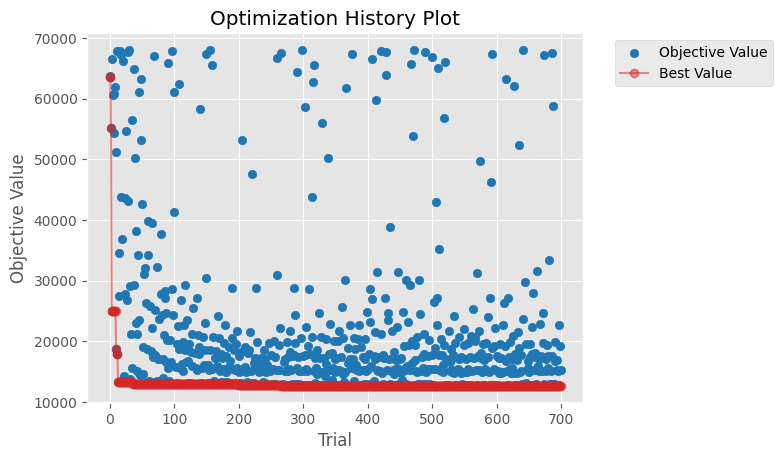

In [88]:
from optuna.visualization.matplotlib import plot_optimization_history
plot_optimization_history(study)

In [89]:
plot_param_importances(study)

In [90]:
params = study.best_params

In [91]:
params

{'booster': 'gbtree',
 'learning_rate': 0.09986616613534406,
 'max_depth': 15,
 'subsample': 0.7162417007411497,
 'reg_alpha': 2.684952999686149e-07,
 'reg_lambda': 3.2602785886197124e-06,
 'gamma': 5.3604883119526475e-08,
 'min_child_weight': 3}

In [92]:
model = XGBRegressor(**params)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=5.3604883119526475e-08, gpu_id=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.09986616613534406, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=15, max_leaves=None,
             min_child_weight=3, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [93]:
print(r2_score(y_test, model.predict(X_test)))
print(np.sqrt(mean_squared_error(y_test, model.predict(X_test))))

0.8593993177327326
67.9257623419359


In [94]:
print(r2_score(y_train, model.predict(X_train)))
print(np.sqrt(mean_squared_error(y_train, model.predict(X_train))))

0.9983586864711618
7.352324059661258
